# HW3: Image filtering

Your assignment is to implement a method that will take an image and a filter and applies a [convolution](https://en.wikipedia.org/wiki/Kernel_(image_processing)) between them. Only 2D filters (of any dimension) will be used and the methods has to be able to handle both grayscale and RGB images. In case of RGB images, the filter is applied to each channel independently. When applying the filter, the pixels outside of the image boundary should be filled with zeros. You can assume that the kernels are square.

Only `numpy` and basic operations such as multiplication and sum can be used. So you cannot use `scipy`, for example.

In [17]:
%load_ext autoreload
%autoreload 2
from filtering.filtering import apply_filter
from filtering.helpers import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## RGB

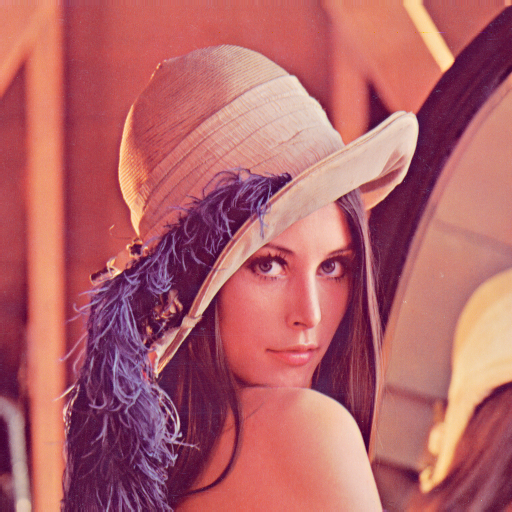

(512, 512, 3)
uint8


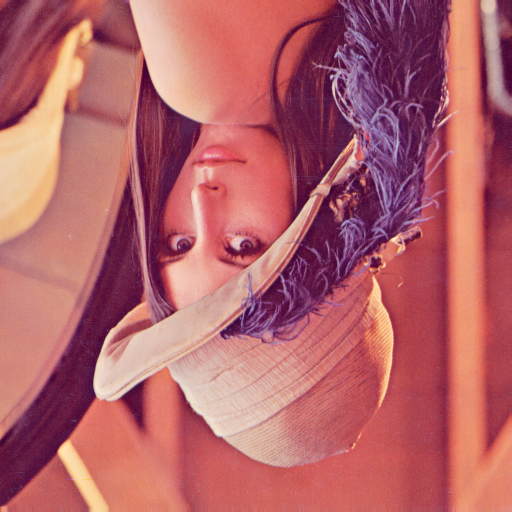

In [18]:
image = read_image('tests/lenna.png')
display_image(image)
print(image.shape)
#display_image(np.transpose(image, axes=[1,0,2]))
#imagearray = np.array(image)
print(image.dtype)
display_image(np.flip(image, axis=(0,1)))
#image

In [20]:
for filter_name, kernel in filters.items():
    print(filter_name)
#     print(image.dtype)
#     print(apply_filter(image, kernel).dtype)
    display_image(apply_filter(image, kernel))

Identity


ValueError: operands could not be broadcast together with shapes (0,0) (3,3) 

## Grayscale

<ipython-input-6-c41c220e20b7>:1: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  image_gray = np.average(image.astype(np.float), weights=[0.299, 0.587, 0.114], axis=2).astype(np.uint8)


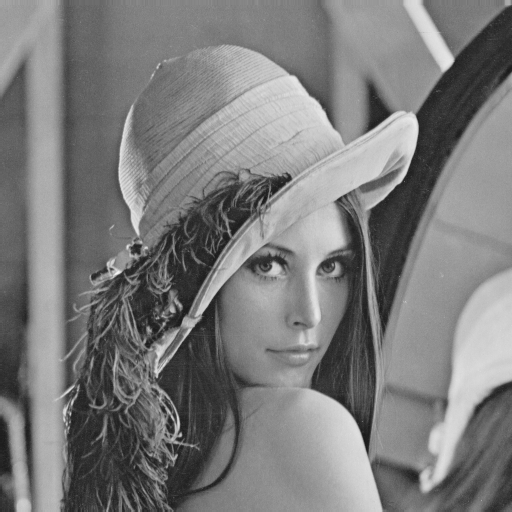

In [6]:
image_gray = np.average(image.astype(np.float), weights=[0.299, 0.587, 0.114], axis=2).astype(np.uint8)
display_image(image_gray, 'L')

Identity


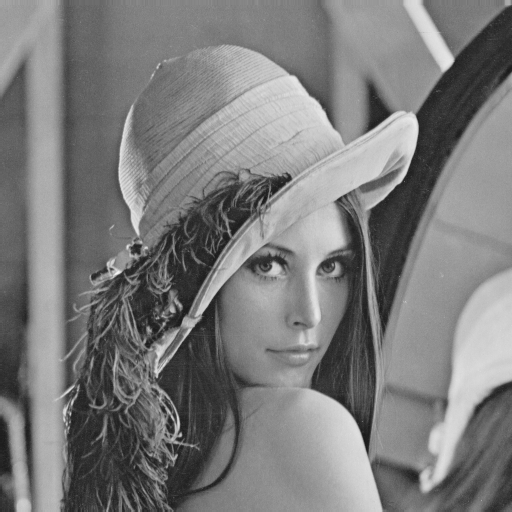

Sharpening


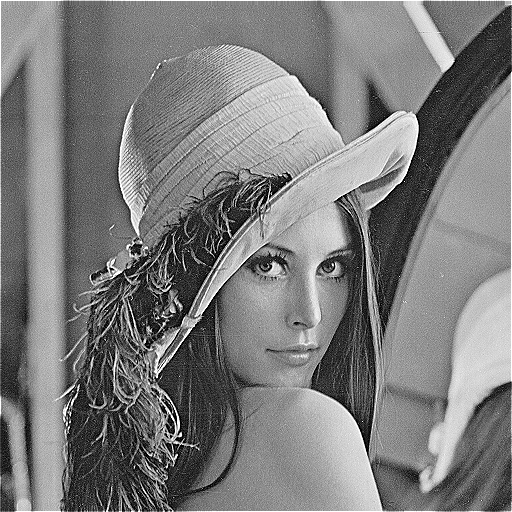

Gaussian blur 3x3 (approx)


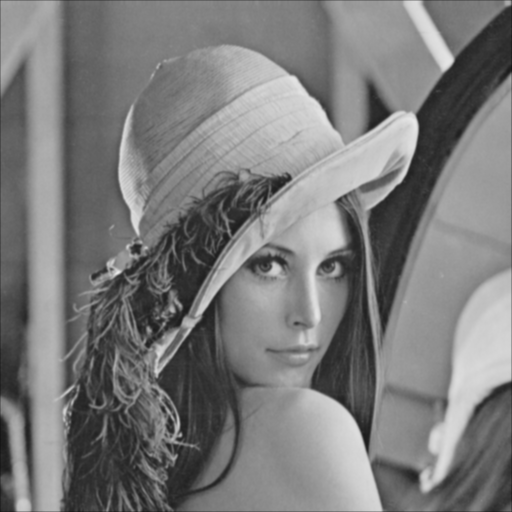

Gaussian blur 5x5 (approx)


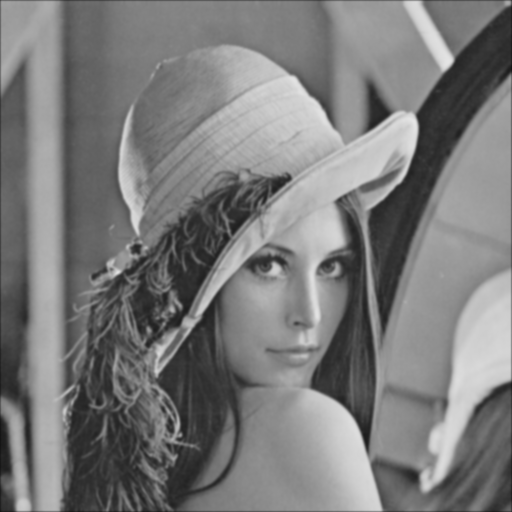

Edge detection


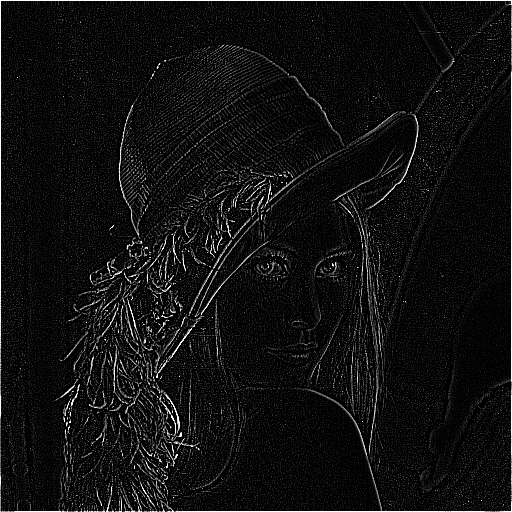

Embossing


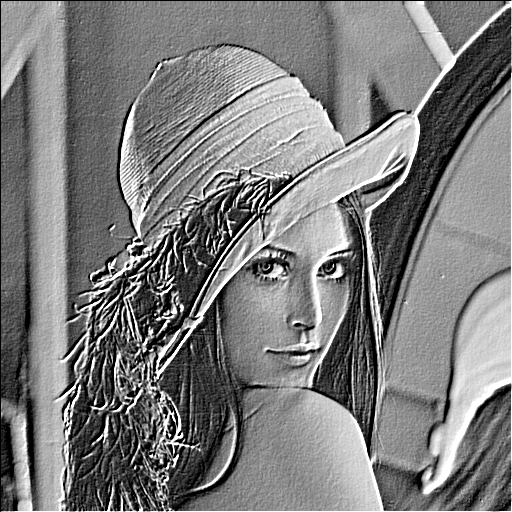

In [16]:
for filter_name, kernel in filters.items():
    print(filter_name)
    display_image(apply_filter(image_gray, kernel).astype(np.int8), 'L')

In [33]:
test_kernel = np.array([[0,1],[1,0]])
test_kernel = np.insert(test_kernel, 1, 0, axis=1)
test_kernel = np.insert(test_kernel, 1, 0, axis=0)
print(test_kernel)

[[0 0 1]
 [0 0 0]
 [1 0 0]]


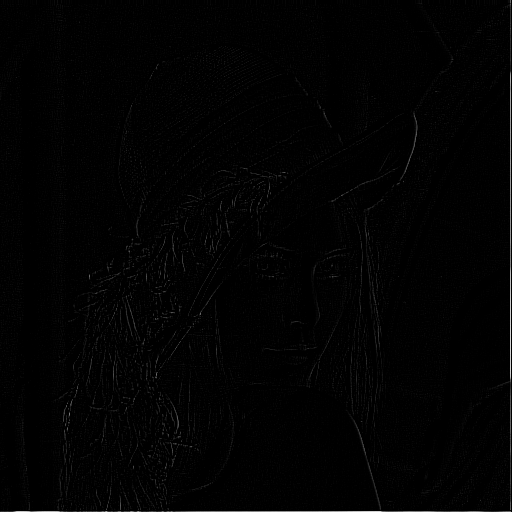

In [58]:
display_image(apply_filter(apply_filter(image_gray, roberts_cross_1_kernel), roberts_cross_2_kernel).astype(np.int8), 'L')